<a href="https://colab.research.google.com/github/surajpandey11/capstone_project2/blob/main/Suraj_Pandey_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

# New section

# New section

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
transport_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 1/Day 1/train_revised.csv')

In [9]:
transport_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [10]:
transport_df[transport_df['max_capacity']==11]


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
12,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11
13,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11
16,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11
17,5792,1,Mpesa,8D9V8HK2FC,20-04-18,5:50,Kisii,Nairobi,shuttle,11
18,5793,1,Mpesa,TTZQDYZHAB,20-04-18,10:58,Kisii,Nairobi,shuttle,11
...,...,...,...,...,...,...,...,...,...,...
51107,13761,2,Mpesa,VCDOGNVTG2,27-11-17,5:00,Kisii,Nairobi,shuttle,11
51156,13769,5,Mpesa,PU4LHLHZVC,19-04-18,6:20,Kijauri,Nairobi,shuttle,11
51195,13761,1,Mpesa,AQGYCPOGLQ,27-11-17,5:00,Kisii,Nairobi,shuttle,11
51468,13804,5,Mpesa,D8LAUAHLFB,20-04-18,7:50,Kijauri,Nairobi,shuttle,11


In [11]:
transport_df['payment_method'].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [12]:
transport_df['car_type'].value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

In [13]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


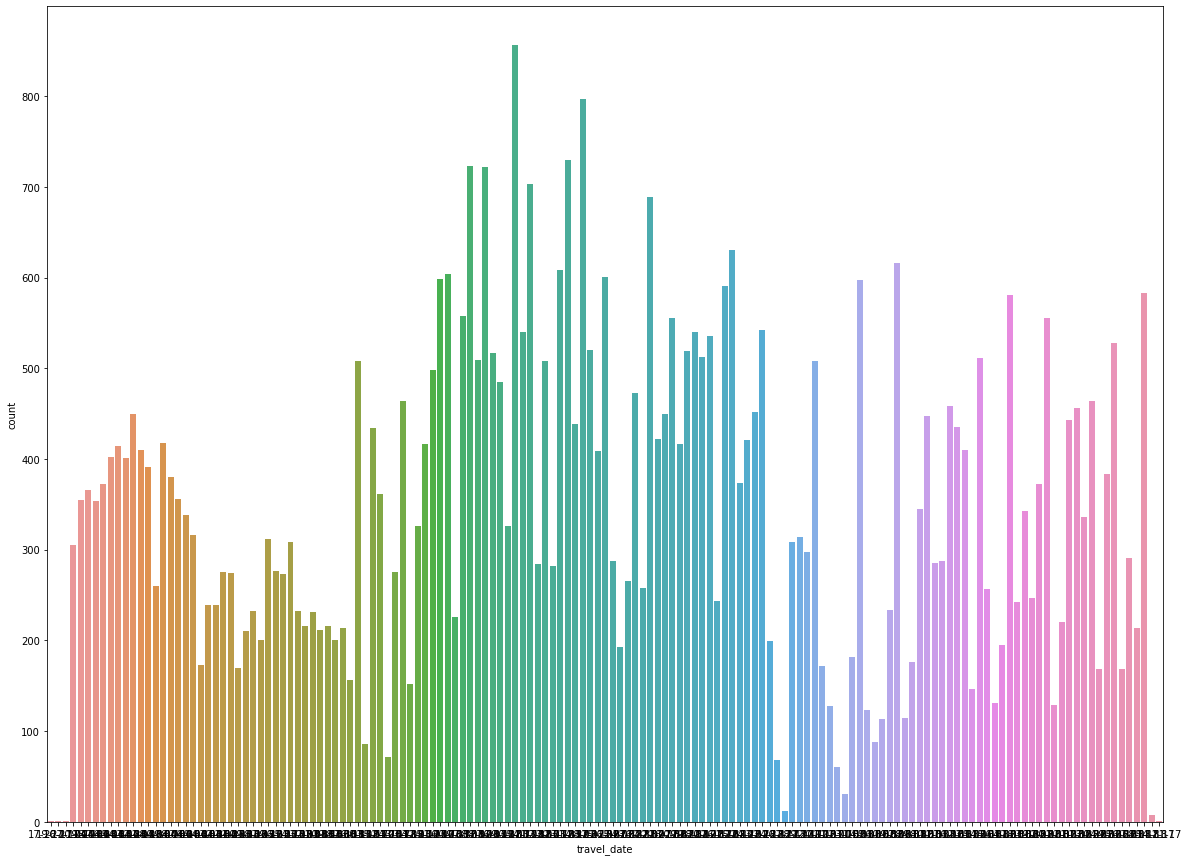

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(transport_df['travel_date'])


In [15]:
transport_df['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [16]:
transport_df['travel_date'].value_counts()

10-12-17    856
14-12-17    797
13-12-17    730
07-12-17    723
08-12-17    722
           ... 
25-12-17      8
17-10-17      1
19-11-17      1
14-11-17      1
26-11-17      1
Name: travel_date, Length: 149, dtype: int64

In [17]:
pd.set_option('display.max_rows', None)

In [18]:
transport_df['ride_id'].value_counts()

8454     50
8090     49
10834    49
11382    49
13211    49
12160    48
8340     48
11710    48
12698    48
13031    48
8089     48
7891     48
8545     48
12995    47
12477    47
8660     47
8095     47
8682     47
12664    47
10441    47
8598     47
13639    47
9714     47
13115    47
8622     47
10897    47
12157    47
11565    47
8093     47
12580    47
8712     47
9807     47
8094     47
8749     46
11568    46
12020    46
12964    46
12419    46
13170    46
11019    46
12315    46
13257    46
12313    46
8498     46
12737    46
11087    46
13689    46
7232     45
11650    45
11440    45
13130    45
11855    45
13585    45
11931    45
13314    44
13534    44
7162     44
7531     44
11518    43
9196     43
7735     43
10340    43
11165    43
13426    43
12098    43
10435    43
10037    43
11625    42
8400     42
11383    42
6972     41
11708    41
12317    41
12449    41
7109     40
7905     40
13789    40
10654    40
11649    40
10240    40
12816    40
12934    40
13786    39
1274

In [19]:
transport_df[transport_df['ride_id']==8454]   

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
14020,8454,18A,Mpesa,RPOXVAJVME,09-01-18,7:00,Sirare,Nairobi,Bus,49
14021,8454,17A,Mpesa,MLT0APU7IV,09-01-18,7:00,Sirare,Nairobi,Bus,49
14022,8454,12B,Mpesa,VMWIO5SZRU,09-01-18,7:00,Sirare,Nairobi,Bus,49
14023,8454,12A,Mpesa,VYZXWTUEAX,09-01-18,7:00,Sirare,Nairobi,Bus,49
14026,8454,10A,Mpesa,LJVXBMLNW6,09-01-18,7:00,Sirare,Nairobi,Bus,49
14027,8454,7B,Mpesa,NFS5RNX8VX,09-01-18,7:00,Sirare,Nairobi,Bus,49
14028,8454,7A,Mpesa,YW6CTMAQEY,09-01-18,7:00,Sirare,Nairobi,Bus,49
14029,8454,9A,Mpesa,LHFFCBC2QC,09-01-18,7:00,Sirare,Nairobi,Bus,49
14030,8454,14A,Mpesa,7U2GHUPMXJ,09-01-18,7:00,Sirare,Nairobi,Bus,49
14031,8454,13A,Mpesa,O7MXQV8VNF,09-01-18,7:00,Sirare,Nairobi,Bus,49


In [20]:
transport_df[transport_df['ride_id']==8090 ] 

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
11418,8090,1A,Mpesa,GU2VNYR9EK,27-12-17,7:08,Migori,Nairobi,Bus,49
11419,8090,2A,Mpesa,YSJU49YMFQ,27-12-17,7:08,Migori,Nairobi,Bus,49
11448,8090,24B,Mpesa,4DUHSCRZLT,27-12-17,7:08,Migori,Nairobi,Bus,49
11452,8090,16A,Mpesa,G1Z2ERJN1I,27-12-17,7:08,Migori,Nairobi,Bus,49
11458,8090,16B,Mpesa,ND7JR5AI0G,27-12-17,7:08,Migori,Nairobi,Bus,49
11459,8090,15B,Mpesa,SYNSFXNOJH,27-12-17,7:08,Migori,Nairobi,Bus,49
11470,8090,15A,Mpesa,DEQNC0U9X3,27-12-17,7:08,Migori,Nairobi,Bus,49
11483,8090,13B,Mpesa,0ILJODSKB7,27-12-17,7:08,Migori,Nairobi,Bus,49
11486,8090,14B,Mpesa,XEGLGZENZA,27-12-17,7:08,Migori,Nairobi,Bus,49
11487,8090,14A,Mpesa,FZGAKZFINP,27-12-17,7:08,Migori,Nairobi,Bus,49


In [21]:
transport_df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

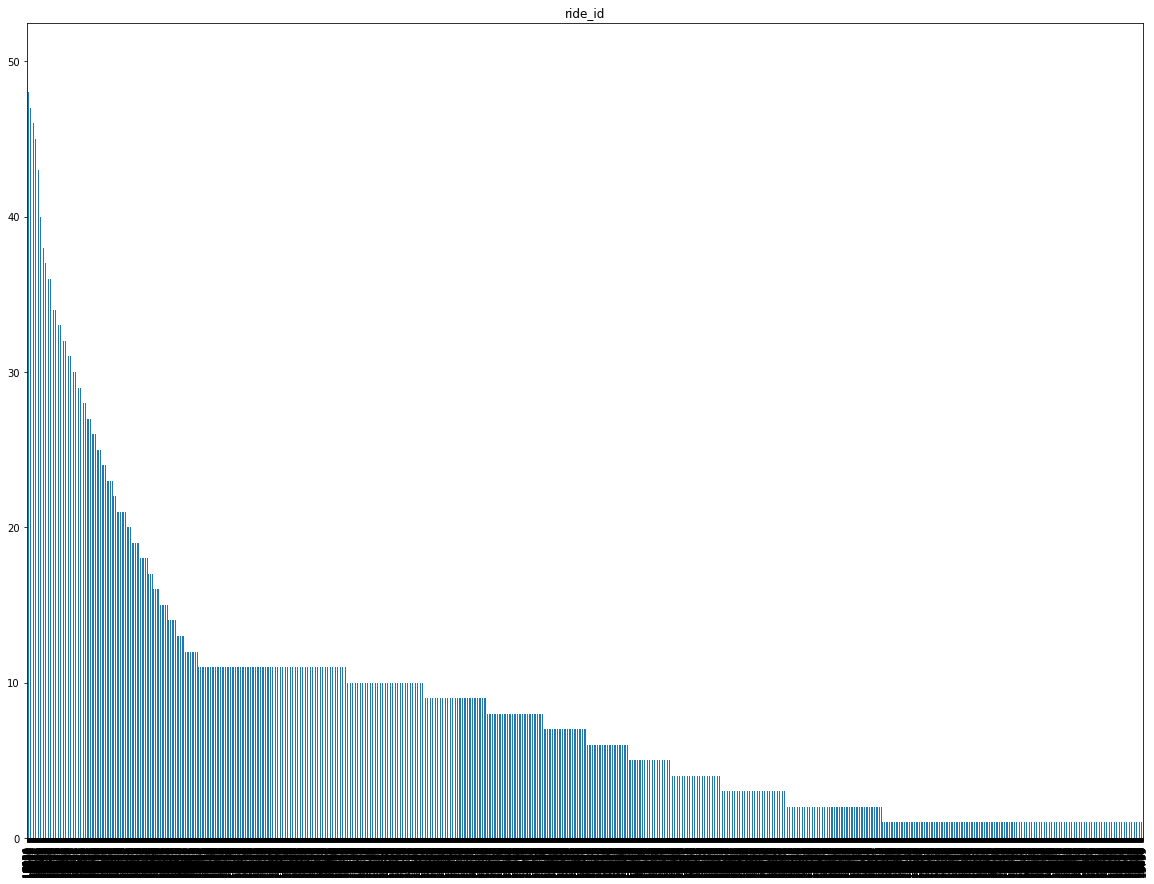

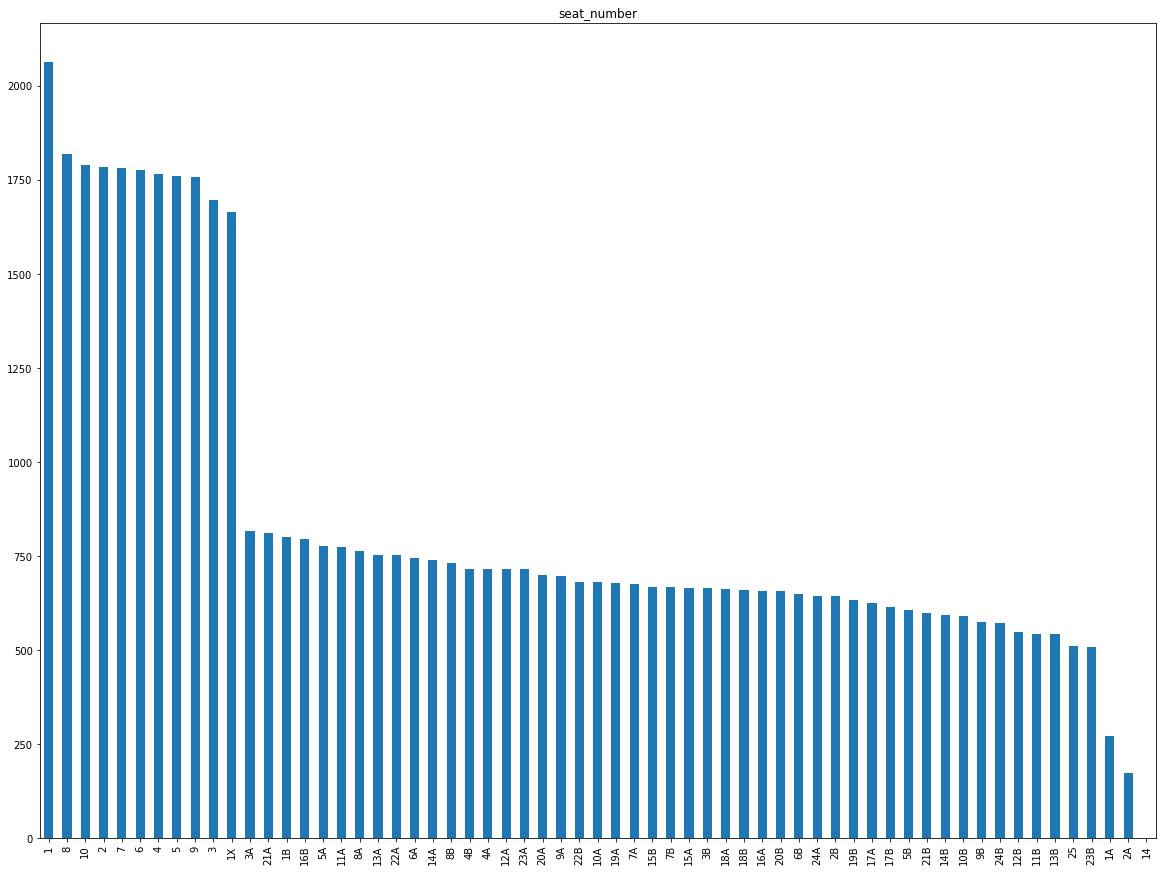

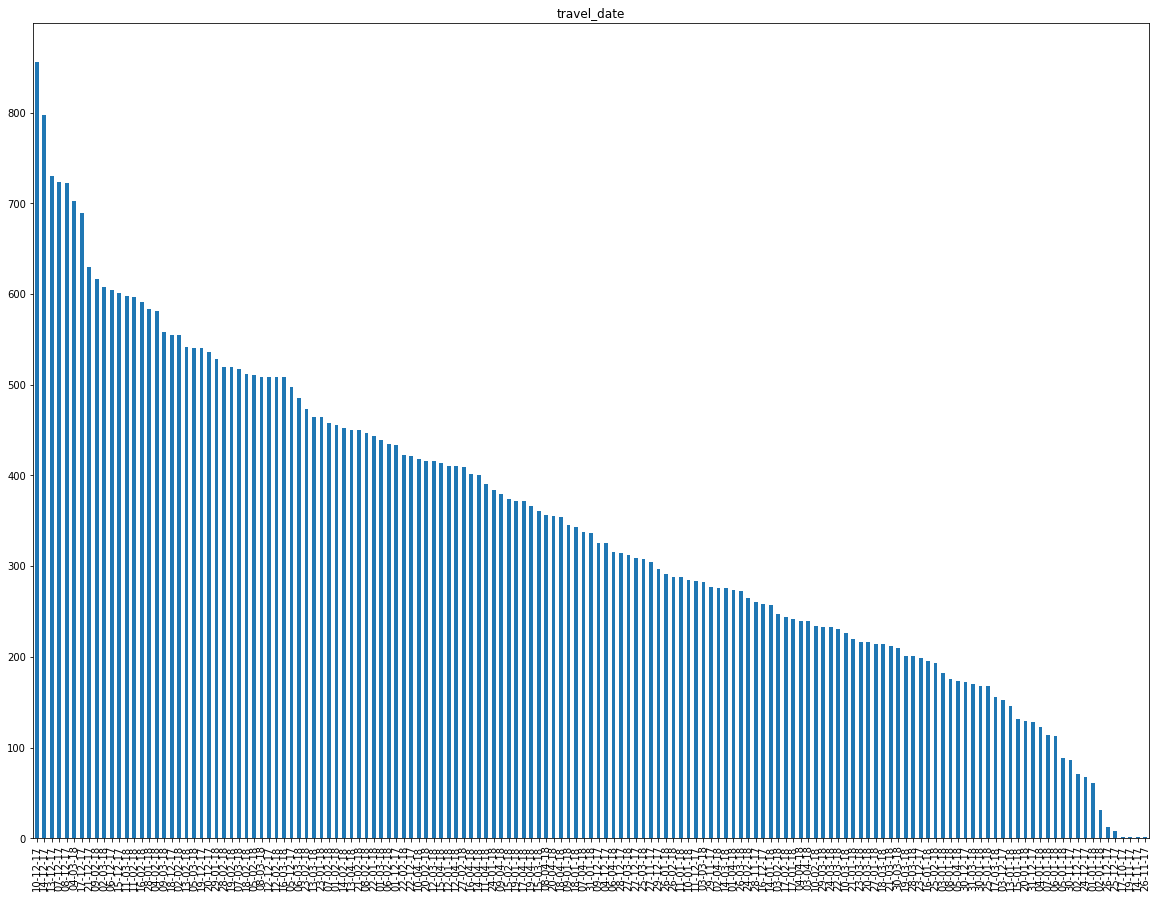

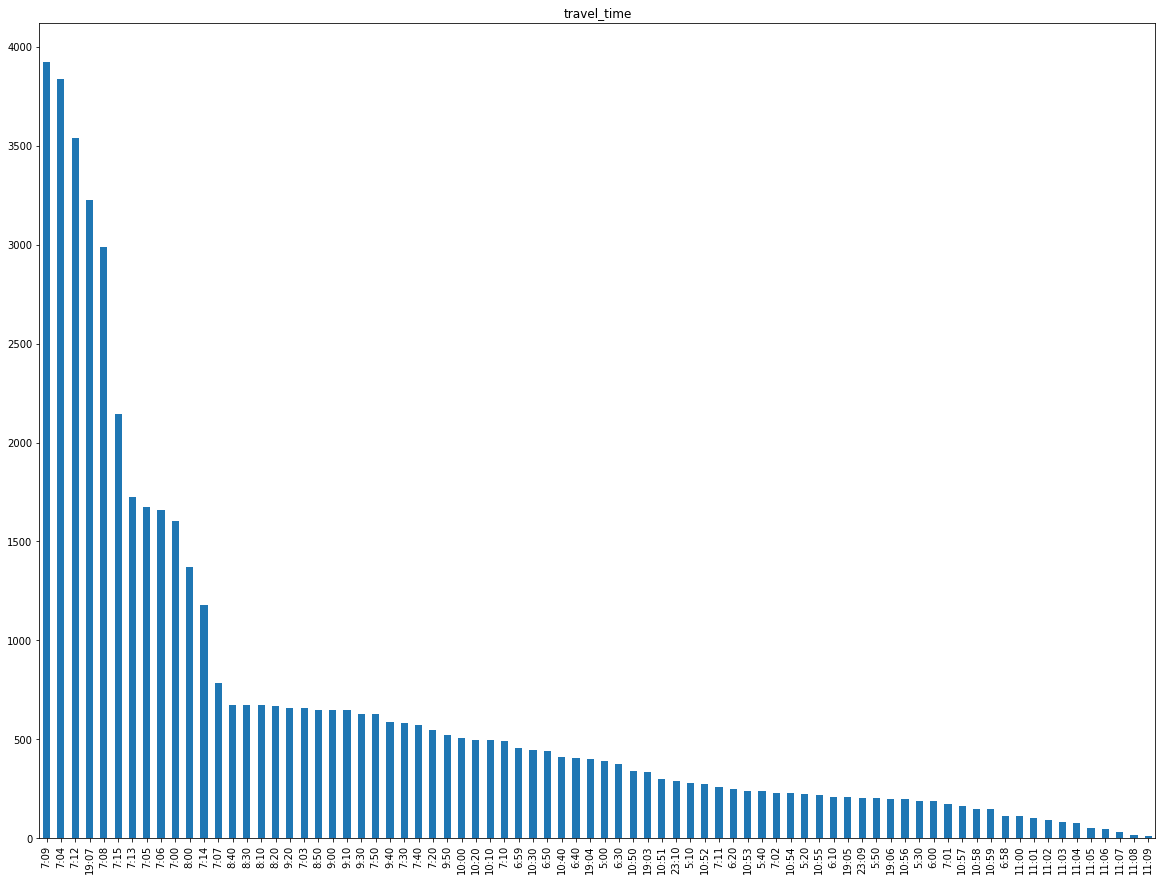

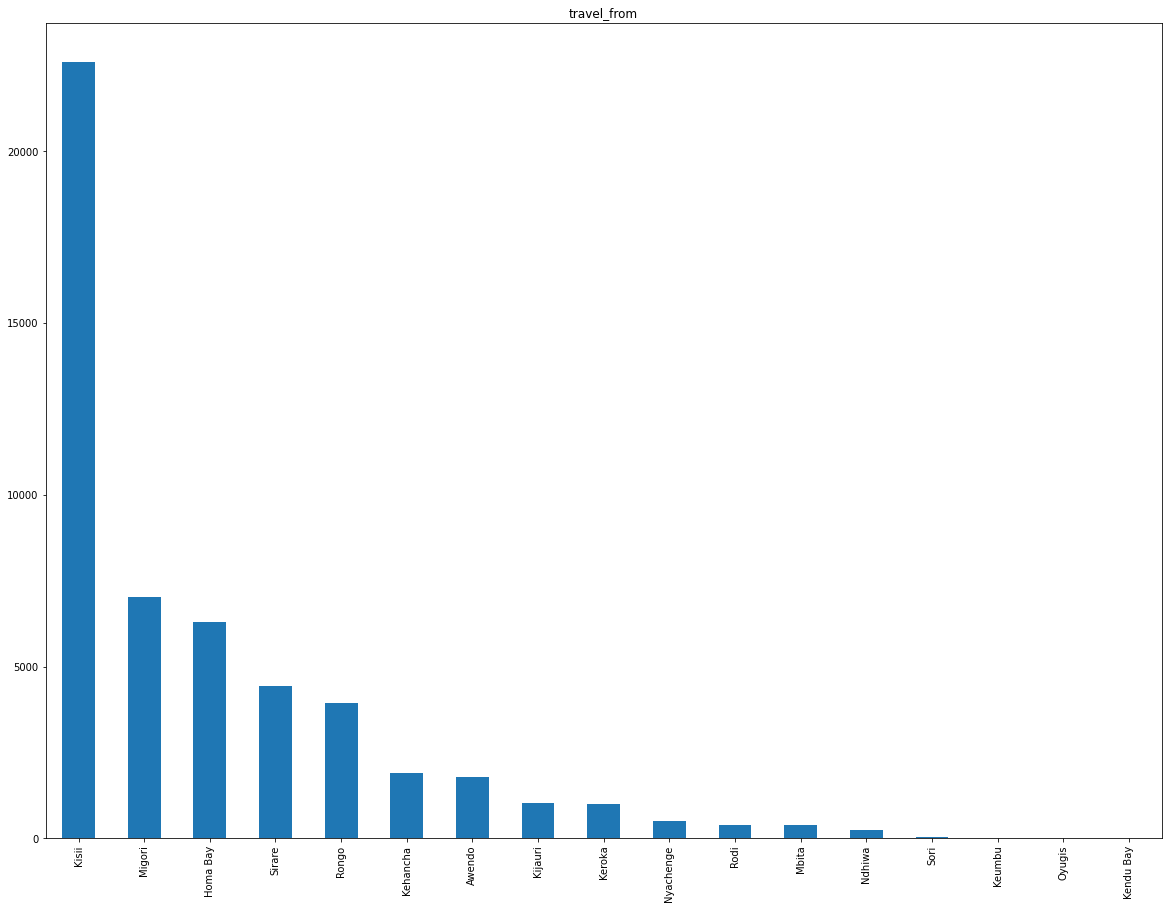

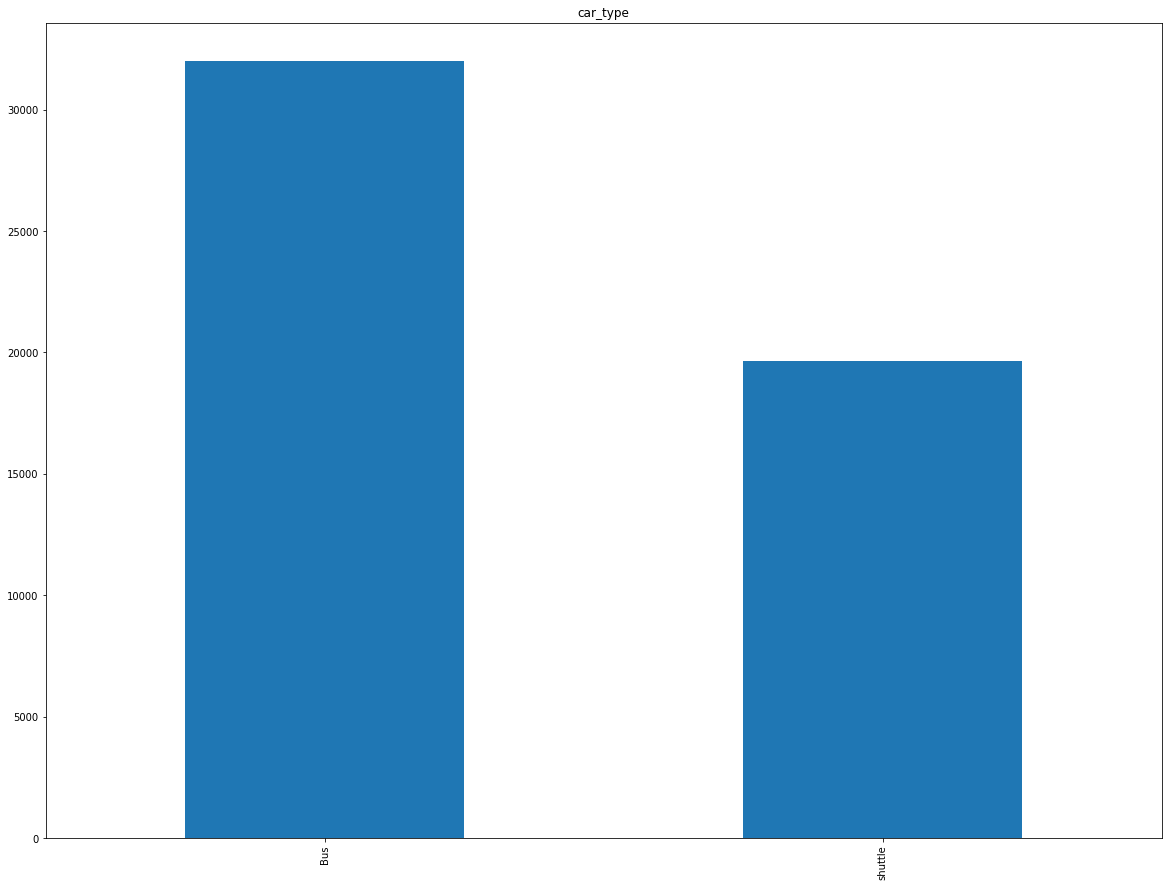

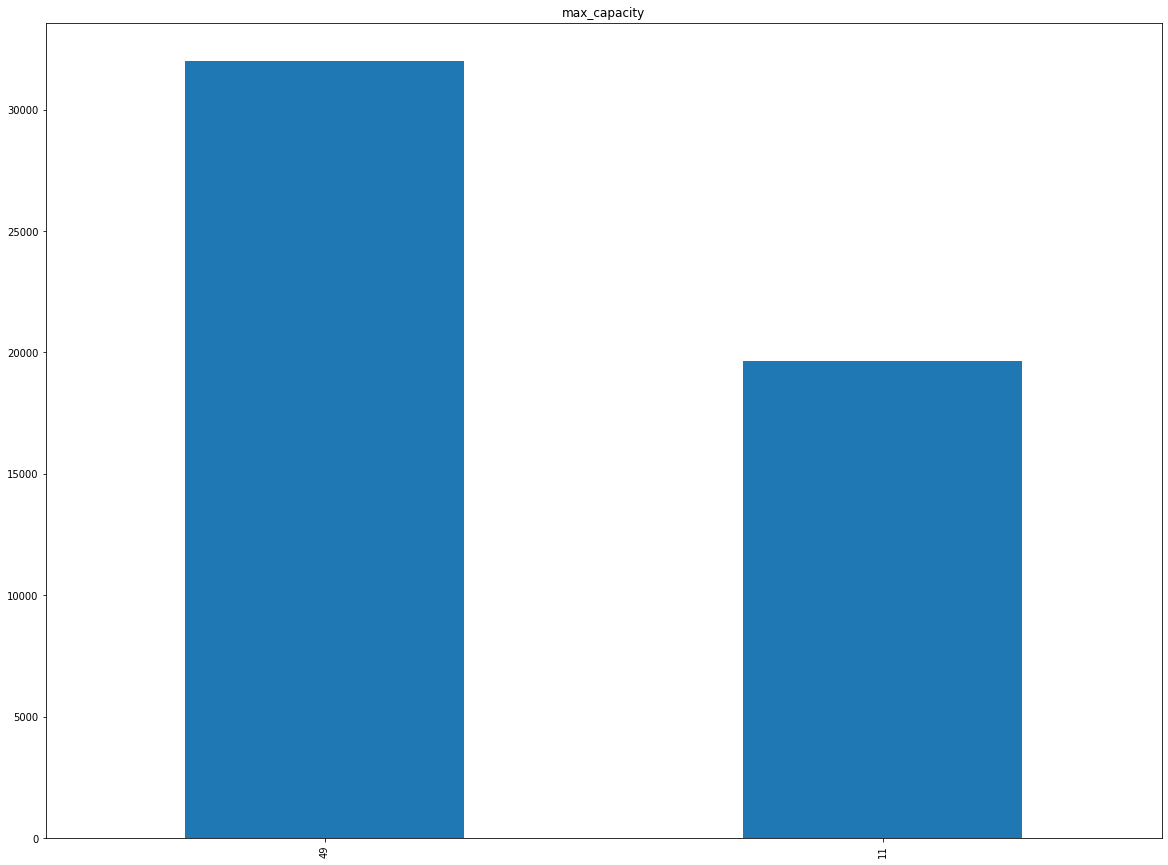

In [22]:
count=0
for element in ['ride_id', 'seat_number',
       'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity']:
  count=count+1
  plt.figure(count)
  plt.subplots(figsize=(20,15))
  transport_df[element].value_counts().plot(kind='bar')
  plt.xticks(rotation='vertical')
  plt.title(element)

In [ ]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [23]:
transport_df=transport_df.groupby('ride_id', as_index=False).agg(list)

In [24]:
def len_of_mpesa(y):
  
   
  return len(y)

In [25]:
transport_df['ticket']=transport_df.apply(lambda x:len_of_mpesa(x['payment_method']),axis=1)

In [27]:
transport_df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,ticket
0,1442,[15A],[Mpesa],[UZUEHCBUSO],[17-10-17],[7:15],[Migori],[Nairobi],[Bus],[49],1
1,5437,[14A],[Mpesa],[TIHLBUSGTE],[19-11-17],[7:12],[Migori],[Nairobi],[Bus],[49],1
2,5710,[8B],[Mpesa],[EQX8Q5G19O],[26-11-17],[7:05],[Keroka],[Nairobi],[Bus],[49],1
3,5777,"[19A, 18B, 14A, 15B, 16B]","[Mpesa, Mpesa, Mpesa, Mpesa, Mpesa]","[SGP18CL0ME, B6PBDU30IZ, MZHGDGS6QZ, 7C7P3D5AJ...","[27-11-17, 27-11-17, 27-11-17, 27-11-17, 27-11...","[7:10, 7:10, 7:10, 7:10, 7:10]","[Homa Bay, Homa Bay, Homa Bay, Homa Bay, Homa ...","[Nairobi, Nairobi, Nairobi, Nairobi, Nairobi]","[Bus, Bus, Bus, Bus, Bus]","[49, 49, 49, 49, 49]",5
4,5778,"[11A, 25, 21B, 3A, 23A, 9A, 24B, 23B, 13B, 22A...","[Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpe...","[BM97HFRGL9, MYVTYFNXDZ, TE1WYK1NYE, JDD4ZL64L...","[27-11-17, 27-11-17, 27-11-17, 27-11-17, 27-11...","[7:12, 7:12, 7:12, 7:12, 7:12, 7:12, 7:12, 7:1...","[Migori, Migori, Migori, Migori, Migori, Migor...","[Nairobi, Nairobi, Nairobi, Nairobi, Nairobi, ...","[Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...",31
5,5781,"[22A, 18B, 17B, 18A, 19A, 20A, 21B, 22B, 25, 2...","[Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpe...","[VGG7Q3MVJX, YJ7JFHOGKA, 4JQOSC881A, KP4YUALFX...","[27-11-17, 27-11-17, 27-11-17, 27-11-17, 27-11...","[7:09, 7:09, 7:09, 7:09, 7:09, 7:09, 7:09, 7:0...","[Homa Bay, Homa Bay, Homa Bay, Homa Bay, Homa ...","[Nairobi, Nairobi, Nairobi, Nairobi, Nairobi, ...","[Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...",26
6,5784,[1X],[Mpesa],[3OPU23FHRB],[20-04-18],[5:10],[Kisii],[Nairobi],[shuttle],[11],1
7,5789,[1X],[Mpesa],[BPRX4UMFFN],[20-04-18],[9:50],[Kisii],[Nairobi],[shuttle],[11],1
8,5790,"[1B, 4A]","[Mpesa, Mpesa]","[DC8ABRSXXK, F8VBKYCXPL]","[20-04-18, 20-04-18]","[7:06, 7:06]","[Kisii, Kisii]","[Nairobi, Nairobi]","[Bus, Bus]","[49, 49]",2
9,5791,[1],[Mpesa],[HGQURN0SZS],[20-04-18],[6:00],[Kisii],[Nairobi],[shuttle],[11],1


In [28]:
def set_element(X):
  a=X[0]
  for elem in X:
    if elem==a:
      return elem
    else:
      return X


In [29]:
for element in ['payment_method','travel_from','travel_to','car_type','max_capacity','travel_date','travel_time']:

  transport_df[element]=transport_df.apply(lambda x:set_element(x[element]),axis=1)

In [30]:
transport_df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,ticket
0,1442,[15A],Mpesa,[UZUEHCBUSO],17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,[14A],Mpesa,[TIHLBUSGTE],19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,[8B],Mpesa,[EQX8Q5G19O],26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,"[19A, 18B, 14A, 15B, 16B]",Mpesa,"[SGP18CL0ME, B6PBDU30IZ, MZHGDGS6QZ, 7C7P3D5AJ...",27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,"[11A, 25, 21B, 3A, 23A, 9A, 24B, 23B, 13B, 22A...",Mpesa,"[BM97HFRGL9, MYVTYFNXDZ, TE1WYK1NYE, JDD4ZL64L...",27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,"[22A, 18B, 17B, 18A, 19A, 20A, 21B, 22B, 25, 2...",Mpesa,"[VGG7Q3MVJX, YJ7JFHOGKA, 4JQOSC881A, KP4YUALFX...",27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,[1X],Mpesa,[3OPU23FHRB],20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,[1X],Mpesa,[BPRX4UMFFN],20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,"[1B, 4A]",Mpesa,"[DC8ABRSXXK, F8VBKYCXPL]",20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,[1],Mpesa,[HGQURN0SZS],20-04-18,6:00,Kisii,Nairobi,shuttle,11,1
